# **Assignment Questions**


# **EDA-1**


In [133]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view'

download_url = gdown.download(url, 'used_bikes.csv', quiet=False, fuzzy=True)

df = pd.read_csv('used_bikes.csv')

df.head()


Downloading...
From: https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3
To: /content/used_bikes.csv
100%|██████████| 66.5k/66.5k [00:00<00:00, 4.04MB/s]


name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('used_bikes.csv')

In [136]:
# 1. What is the range of selling prices in the dataset
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())
print(f"Range of selling prices: {selling_price_range}")


Range of selling prices: (5000, 760000)


In [137]:
# 2: What is the median selling price for bikes in the dataset
median_selling_price = df['selling_price'].median()
print(f"Median selling price: {median_selling_price}")


Median selling price: 45000.0


In [138]:
# 3: What is the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller_type}")


Most common seller type: Individual


In [139]:
# 4: How many bikes have driven more than 50,000 kilometers
bikes_above_50000_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 km: {bikes_above_50000_km}")


Number of bikes driven more than 50,000 km: 170


In [140]:
# 5: What is the average km_driven value for each ownership type
avg_km_driven_per_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven per ownership type:")
print(avg_km_driven_per_owner)


Average km_driven per ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [141]:
# 6: What proportion of bikes are from the year 2015 or older
proportion_2015_or_older = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print(f"Proportion of bikes from year 2015 or older: {proportion_2015_or_older:.2f}")


Proportion of bikes from year 2015 or older: 0.57


In [142]:
# 7: What is the trend of missing values across the dataset
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / df.shape[0]) * 100
print("Missing values count per column:")
print(missing_values_count)
print("\nMissing values percentage per column:")
print(missing_values_percentage)


Missing values count per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing values percentage per column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


In [143]:
# 8: What is the highest ex_showroom_price recorded, and for which bike
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax(), 'name']
print(f"Highest ex_showroom_price: {max_ex_showroom_price} for bike: {bike_with_max_ex_showroom_price}")


Highest ex_showroom_price: 1278000.0 for bike: Harley-Davidson Street Bob


In [144]:
# 9: What is the total number of bikes listed by each seller type
bikes_per_seller_type = df['seller_type'].value_counts()
print("Number of bikes listed by each seller type:")
print(bikes_per_seller_type)


Number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


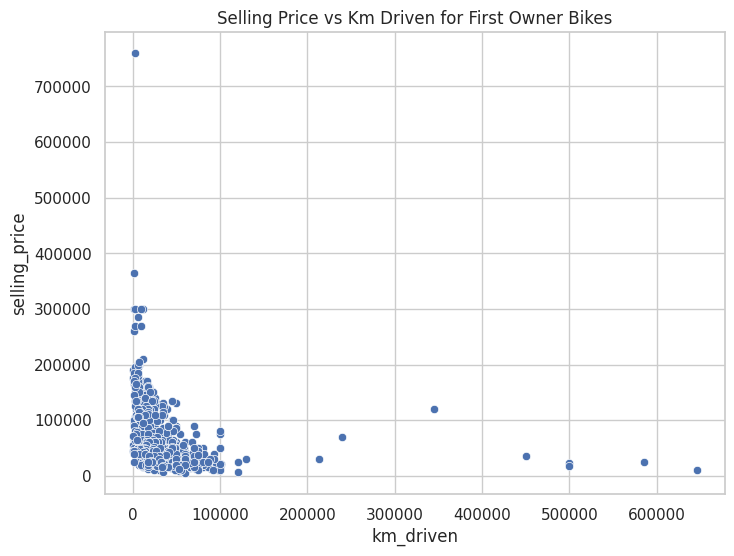

In [145]:
# 10: What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(8,6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs Km Driven for First Owner Bikes')
plt.show()


In [146]:
# 11: Identify and remove outliers in km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers in km_driven: {df_no_outliers.shape[0]}")


Original dataset size: 1061
Dataset size after removing outliers in km_driven: 1022


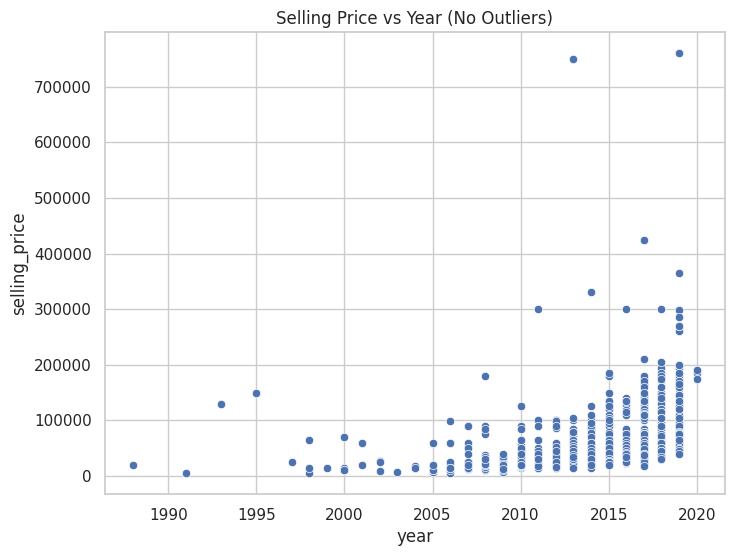

In [147]:
# 12: Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='selling_price', data=df_no_outliers)
plt.title('Selling Price vs Year (No Outliers)')
plt.show()


Average selling price by bike age:
    age  selling_price
0     5  183333.333333
1     6  119689.511628
2     7   87660.374046
3     8   78894.736842
4     9   58469.018692
5    10   56500.000000
6    11   48668.131868
7    12   51136.986301
8    13   35748.400000
9    14   35655.721311
10   15   31793.333333
11   16   22267.857143
12   17   34289.285714
13   18   24927.586207
14   19   23380.000000
15   20   16978.571429
16   21   15100.000000
17   22    8000.000000
18   23   20666.666667
19   24   40000.000000
20   25   20833.333333
21   26   15000.000000
22   27   28333.333333
23   28   17500.000000
24   30  150000.000000
25   32  130000.000000
26   34    6000.000000
27   37   20000.000000


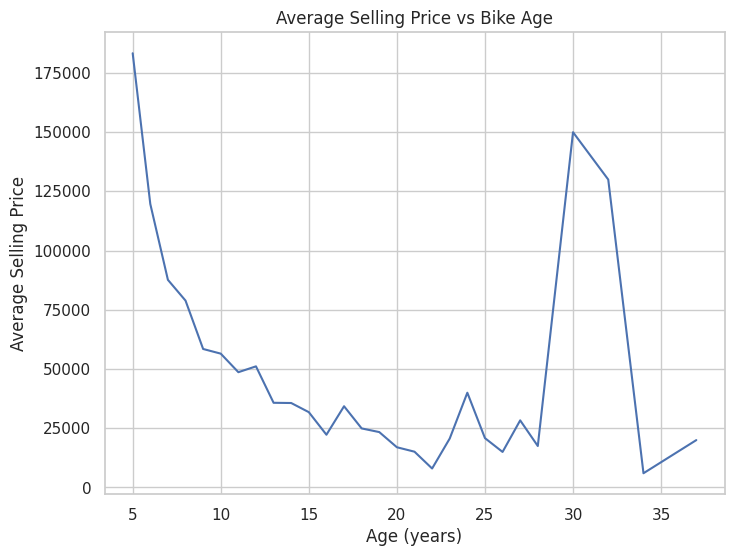

In [148]:
# 13: What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
current_year = datetime.now().year
df['age'] = current_year - df['year']
avg_price_by_age = df.groupby('age')['selling_price'].mean().reset_index()
print("Average selling price by bike age:")
print(avg_price_by_age)

plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='selling_price', data=avg_price_by_age)
plt.title('Average Selling Price vs Bike Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Selling Price')
plt.show()


In [149]:
# 14: Which bike names are priced significantly above the average price for their manufacturing year
avg_price_per_year = df.groupby('year')['selling_price'].mean()
df['avg_price_year'] = df['year'].map(avg_price_per_year)
df['price_diff'] = df['selling_price'] - df['avg_price_year']

highly_priced_bikes = df[df['price_diff'] > df['price_diff'].mean()]
print("Bikes priced significantly above the average for their manufacturing year:")
print(highly_priced_bikes[['name', 'year', 'selling_price', 'avg_price_year', 'price_diff']])


Bikes priced significantly above the average for their manufacturing year:
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
...                                    ...   ...            ...   
1004                  Bajaj Pulsar  NS 200  2016          60000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1012                   Bajaj Pulsar NS 200  2014          50000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      avg_price_year     price_diff  
0      119689.511628   55310.488372  
2       87660.374046   62339.625954  
3     

Correlation matrix:
                   selling_price          year  km_driven  ex_showroom_price  \
selling_price           1.000000  4.021884e-01  -0.212937           0.918583   
year                    0.402188  1.000000e+00  -0.288675           0.126378   
km_driven              -0.212937 -2.886754e-01   1.000000          -0.122011   
ex_showroom_price       0.918583  1.263783e-01  -0.122011           1.000000   
age                    -0.402188 -1.000000e+00   0.288675          -0.126378   
avg_price_year          0.501140  8.025470e-01  -0.309402           0.146598   
price_diff              0.865366  1.830316e-14  -0.066888           0.930385   

                            age  avg_price_year    price_diff  
selling_price     -4.021884e-01    5.011400e-01  8.653662e-01  
year              -1.000000e+00    8.025470e-01  1.830316e-14  
km_driven          2.886754e-01   -3.094020e-01 -6.688842e-02  
ex_showroom_price -1.263783e-01    1.465977e-01  9.303852e-01  
age                

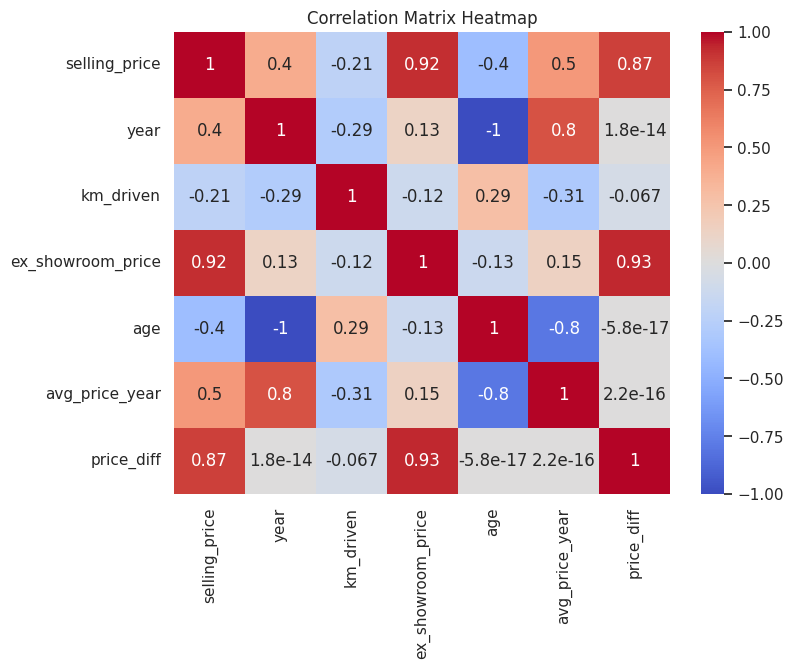

In [150]:
# 15: Develop a correlation matrix for numeric columns and visualize it using a heatmap
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# **EDA-2**

In [151]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view'

download_url = gdown.download(url, 'CarSales.csv', quiet=False, fuzzy=True)

df = pd.read_csv('CarSales.csv')

df.head()


Downloading...
From: https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U
To: /content/CarSales.csv
100%|██████████| 3.83M/3.83M [00:00<00:00, 30.1MB/s]


Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [152]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CarSales.csv')

Average selling price per dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.5

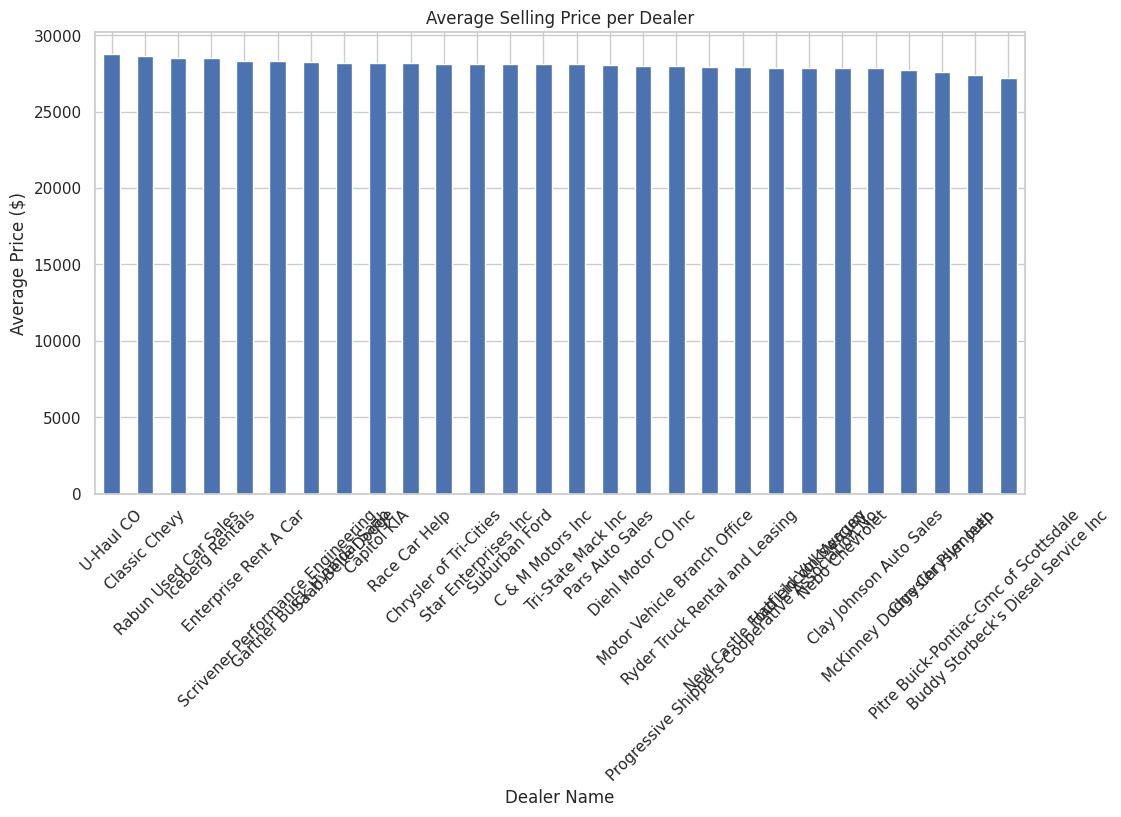

In [153]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price per dealer:")
print(avg_price_per_dealer, "\n")

plt.figure(figsize=(12,6))
avg_price_per_dealer.plot(kind='bar')
plt.title('Average Selling Price per Dealer')
plt.ylabel('Average Price ($)')
plt.xlabel('Dealer Name')
plt.xticks(rotation=45)
plt.show()


Price variation (std dev) by company:
Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64 



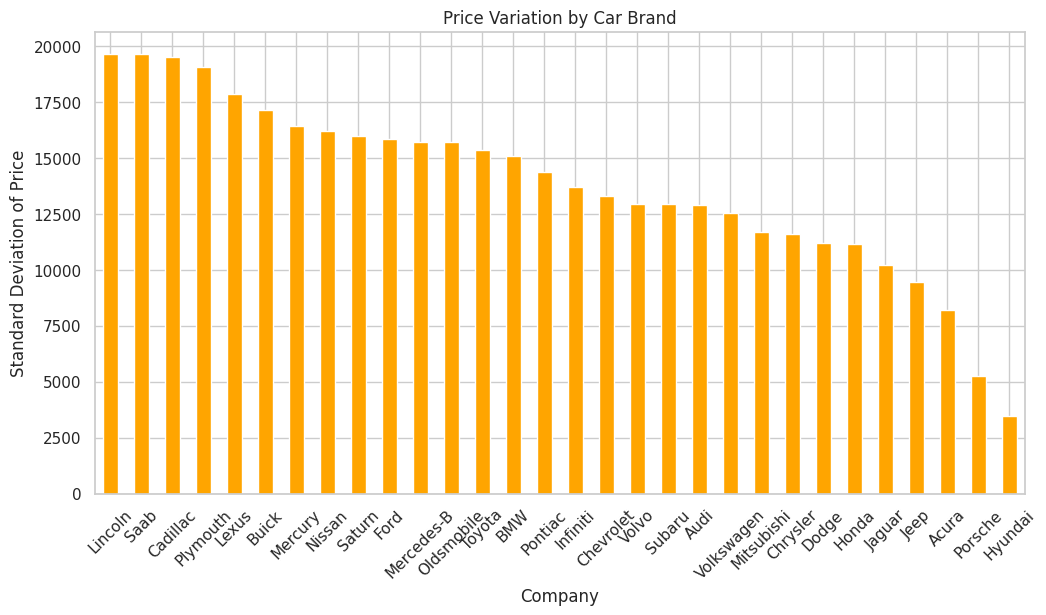

In [154]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Price variation (std dev) by company:")
print(price_variation.head(), "\n")

plt.figure(figsize=(12,6))
price_variation.plot(kind='bar', color='orange')
plt.title('Price Variation by Car Brand')
plt.ylabel('Standard Deviation of Price')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.show()


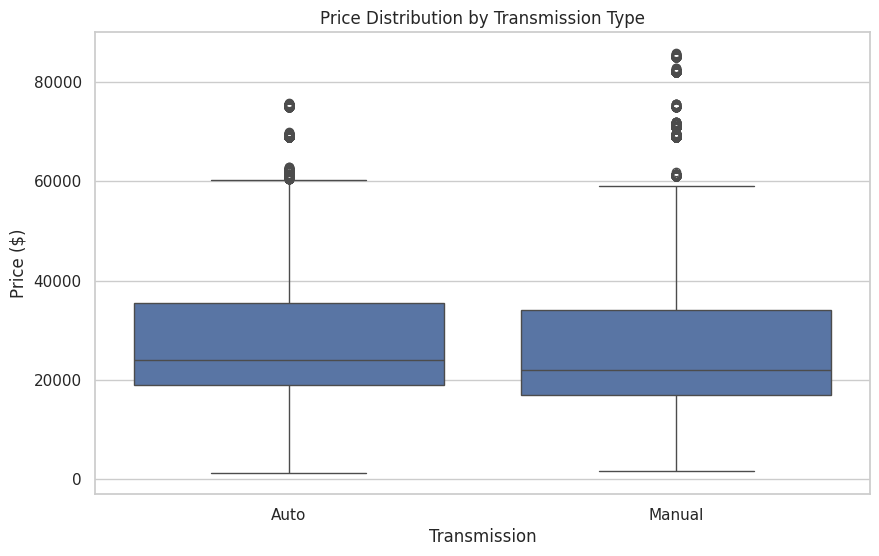

Interquartile range of prices by transmission type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64 



In [155]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

iqr_transmission = df.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("Interquartile range of prices by transmission type:")
print(iqr_transmission, "\n")


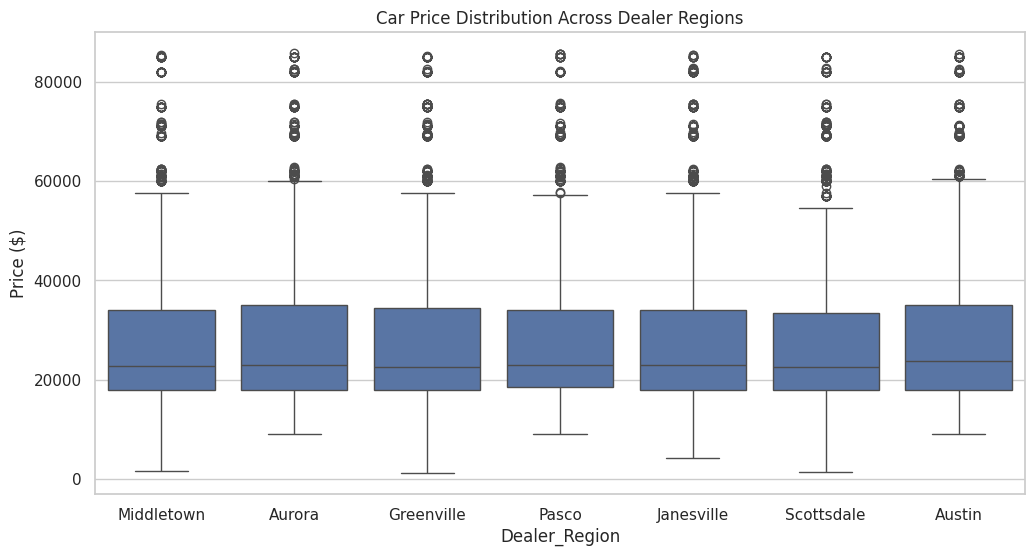

In [156]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(12,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution Across Dealer Regions')
plt.show()


Distribution of cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64 



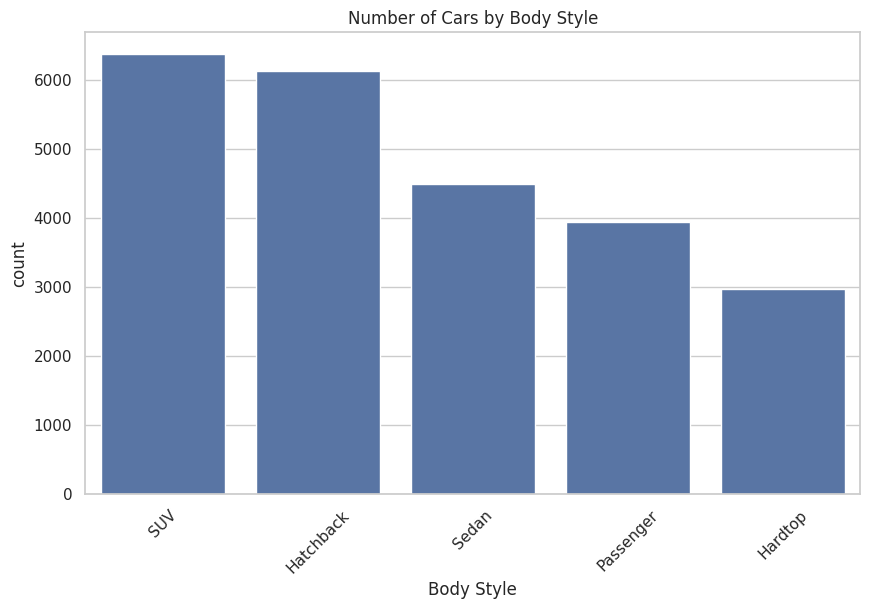

In [157]:
# 5.  What is the distribution of cars based on body styles?
body_style_counts = df['Body Style'].value_counts()
print("Distribution of cars by Body Style:")
print(body_style_counts, "\n")

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Body Style', order=body_style_counts.index)
plt.title('Number of Cars by Body Style')
plt.xticks(rotation=45)
plt.show()


Average selling price and annual income by gender:
           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207 



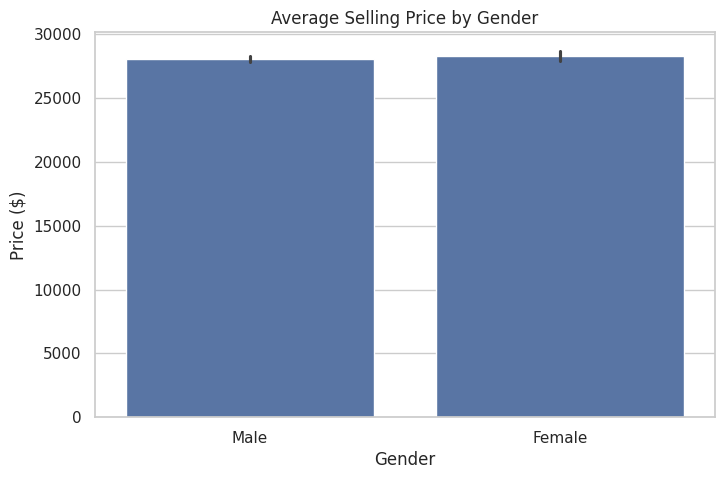

In [158]:
# 6. How does average selling price vary by customer gender and annual income
avg_price_gender_income = df.groupby(['Gender']).agg({'Price ($)': 'mean', 'Annual Income': 'mean'})
print("Average selling price and annual income by gender:")
print(avg_price_gender_income, "\n")

plt.figure(figsize=(8,5))
sns.barplot(x='Gender', y='Price ($)', data=df)
plt.title('Average Selling Price by Gender')
plt.show()


Average car price by region:
Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64 

Number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64 



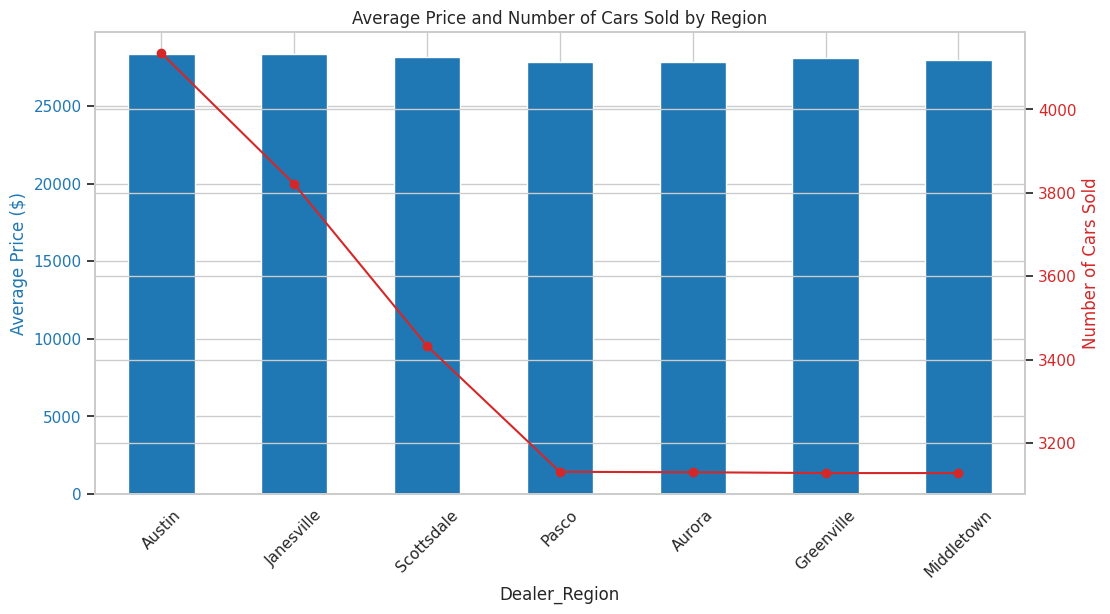

In [159]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_price_avg = df.groupby('Dealer_Region')['Price ($)'].mean()
region_car_count = df['Dealer_Region'].value_counts()

print("Average car price by region:")
print(region_price_avg, "\n")
print("Number of cars sold by region:")
print(region_car_count, "\n")

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Dealer Region')
ax1.set_ylabel('Average Price ($)', color=color)
region_price_avg.plot(kind='bar', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(region_price_avg.index, rotation=45)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Cars Sold', color=color)
region_car_count.plot(kind='line', ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Price and Number of Cars Sold by Region')
plt.show()


Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64 



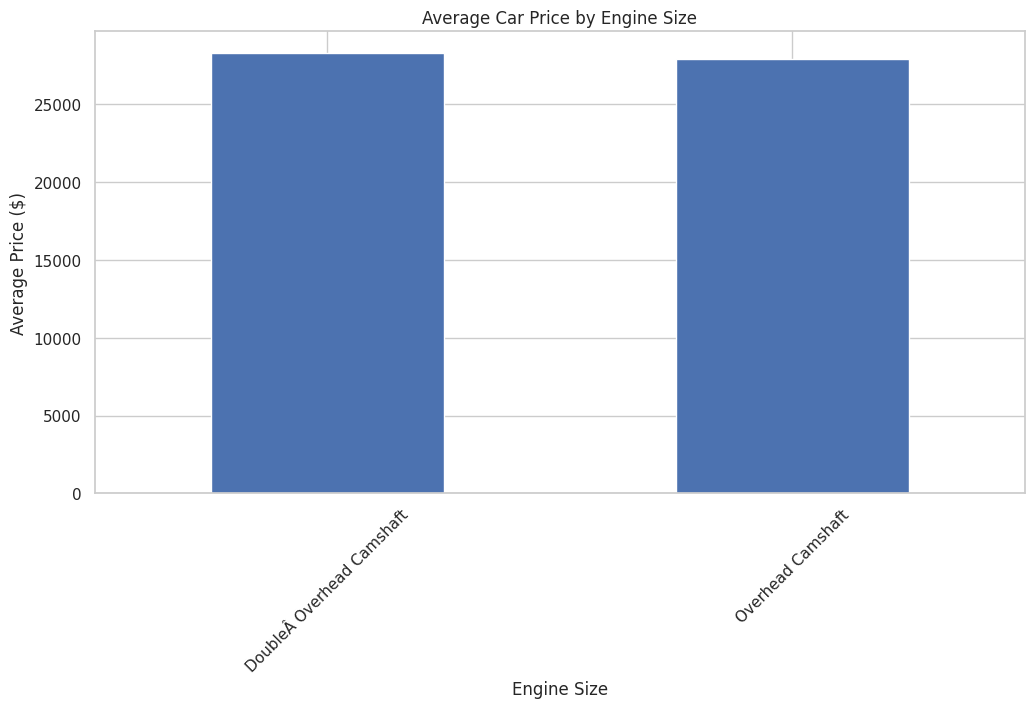

In [160]:
# 8. How does the average car price differ between cars with different engine sizes?
engine_price_avg = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average car price by engine size:")
print(engine_price_avg, "\n")

plt.figure(figsize=(12,6))
engine_price_avg.plot(kind='bar')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


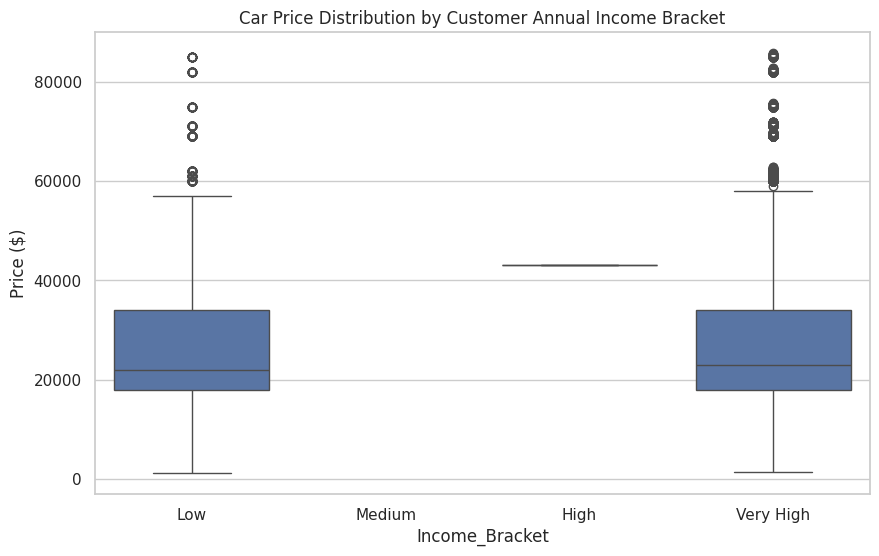

In [161]:
# 9. How do car prices vary based on customer’s annual income bracket
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 100000, np.inf],
                              labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Customer Annual Income Bracket')
plt.show()


Top 5 car models with highest sales:
['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup'] 



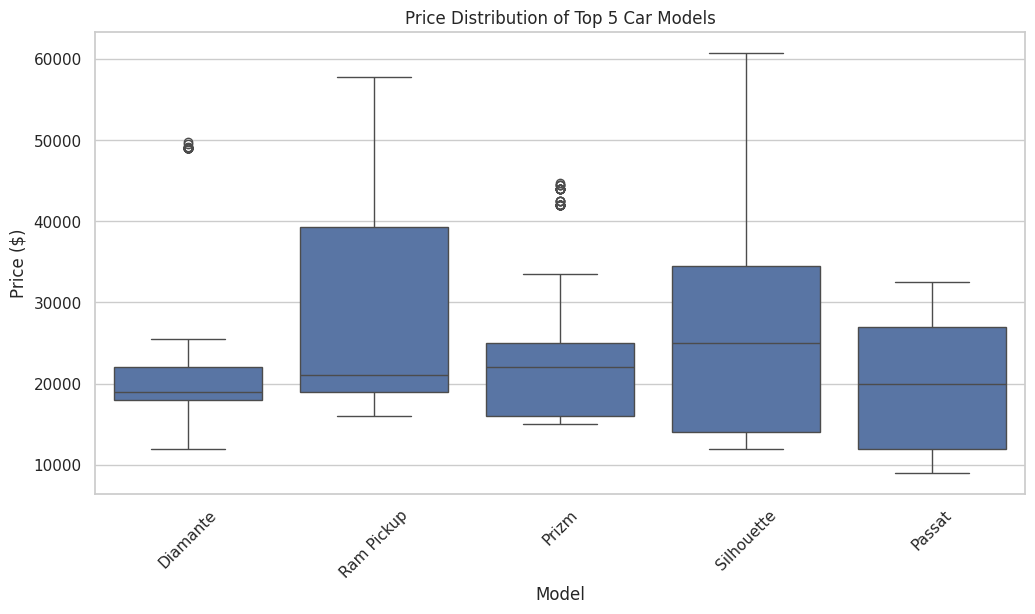

In [162]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df['Model'].value_counts().head(5).index
print("Top 5 car models with highest sales:")
print(top_5_models.tolist(), "\n")

plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_5_models)])
plt.title('Price Distribution of Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()


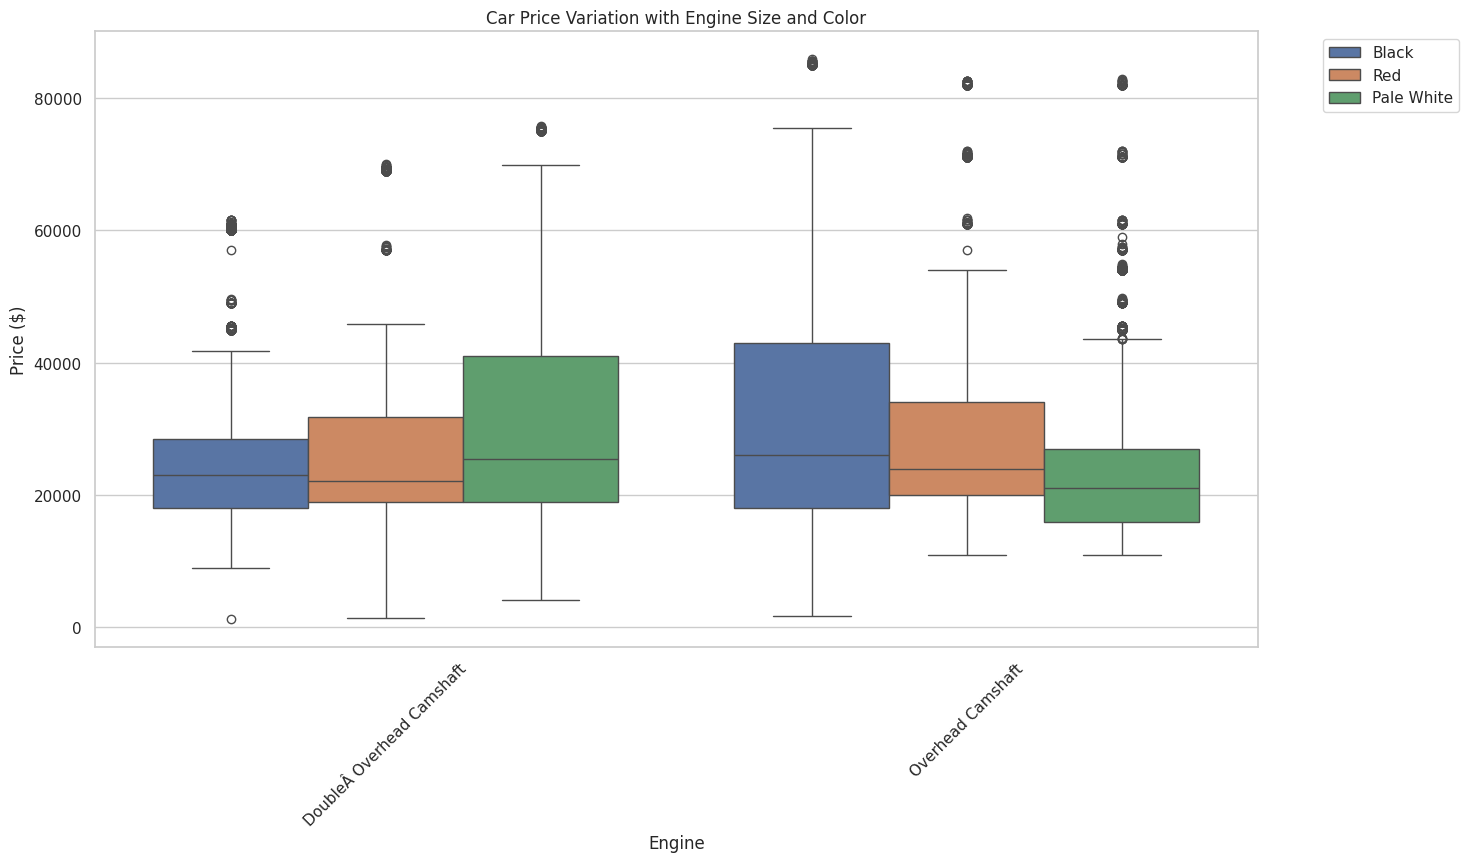

Colors with highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64 



In [163]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(15,8))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price Variation with Engine Size and Color')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

color_price_std = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Colors with highest price variation:")
print(color_price_std.head(), "\n")


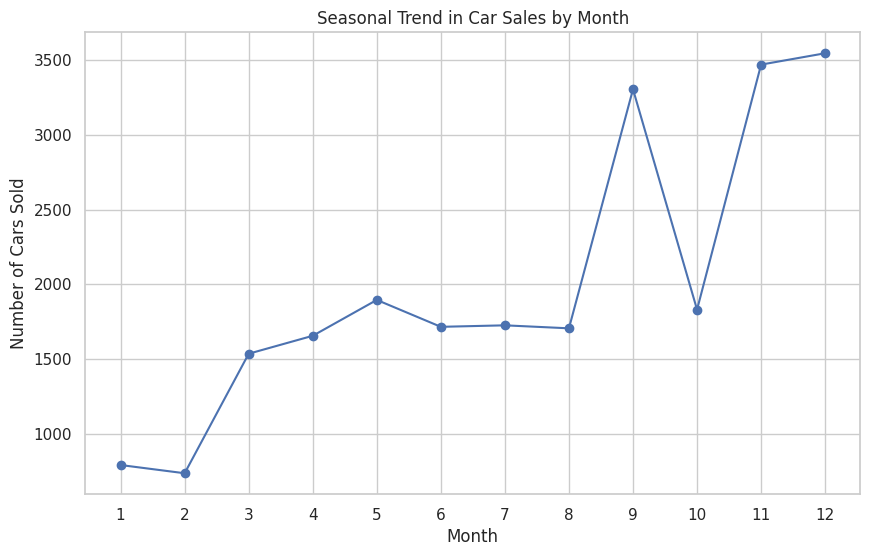

In [164]:
# 12. Is there any seasonal trend in car sales based on date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month').size()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Seasonal Trend in Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1,13))
plt.show()


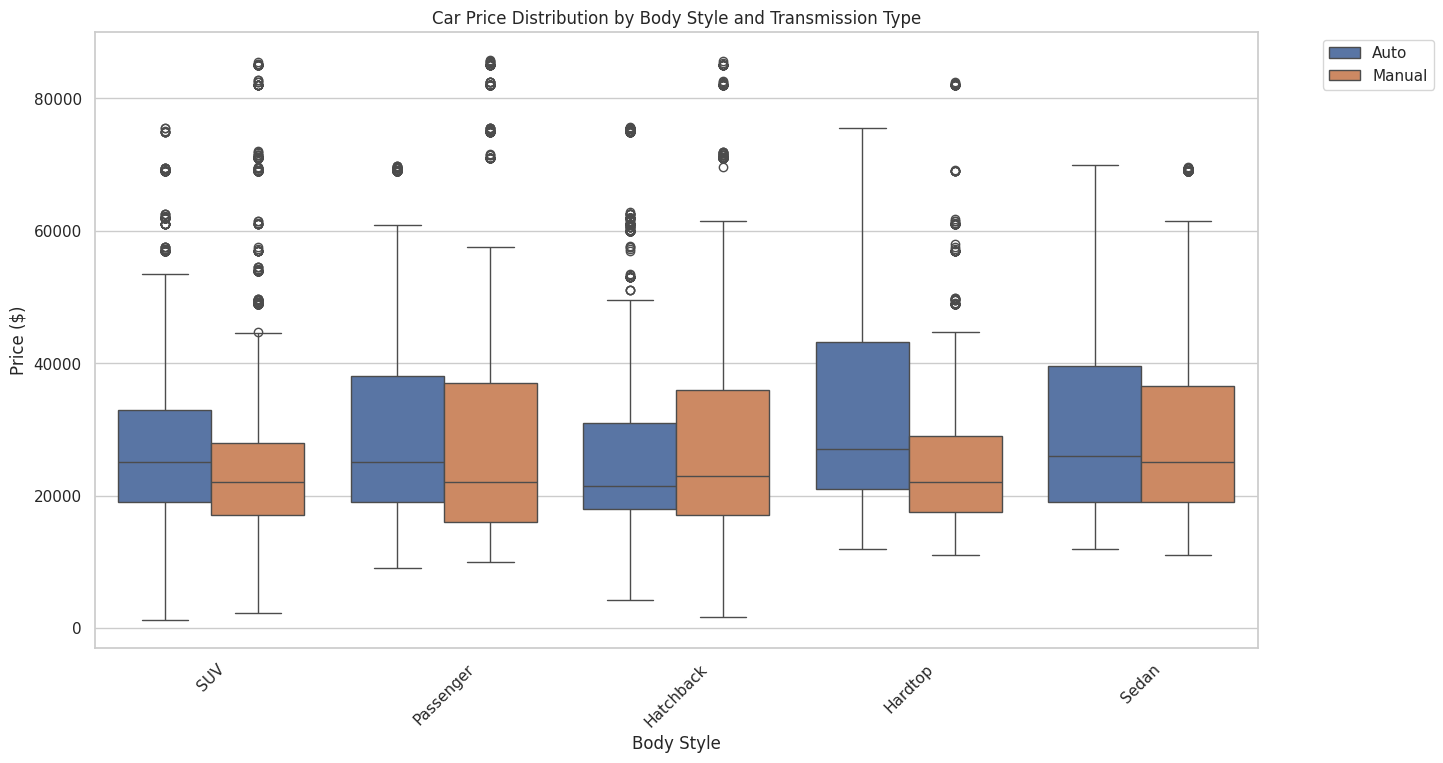

In [165]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(15,8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Correlation matrix:
               Price ($)  Engine_num  Annual Income
Price ($)       1.000000   -0.011271       0.012065
Engine_num     -0.011271    1.000000      -0.006598
Annual Income   0.012065   -0.006598       1.000000 



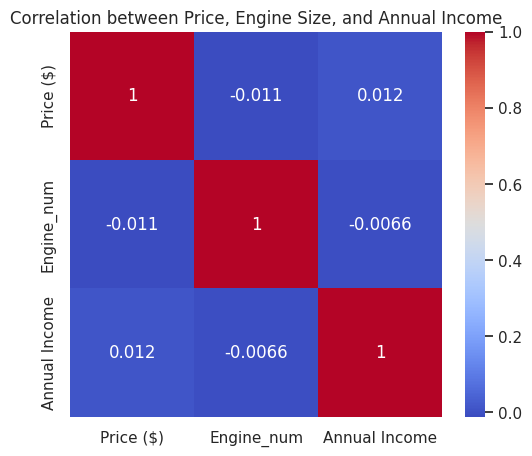

In [166]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
engine_mapping = {k: idx for idx, k in enumerate(df['Engine'].unique())}
df['Engine_num'] = df['Engine'].map(engine_mapping)

corr = df[['Price ($)', 'Engine_num', 'Annual Income']].corr()
print("Correlation matrix:")
print(corr, "\n")

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Price, Engine Size, and Annual Income')
plt.show()


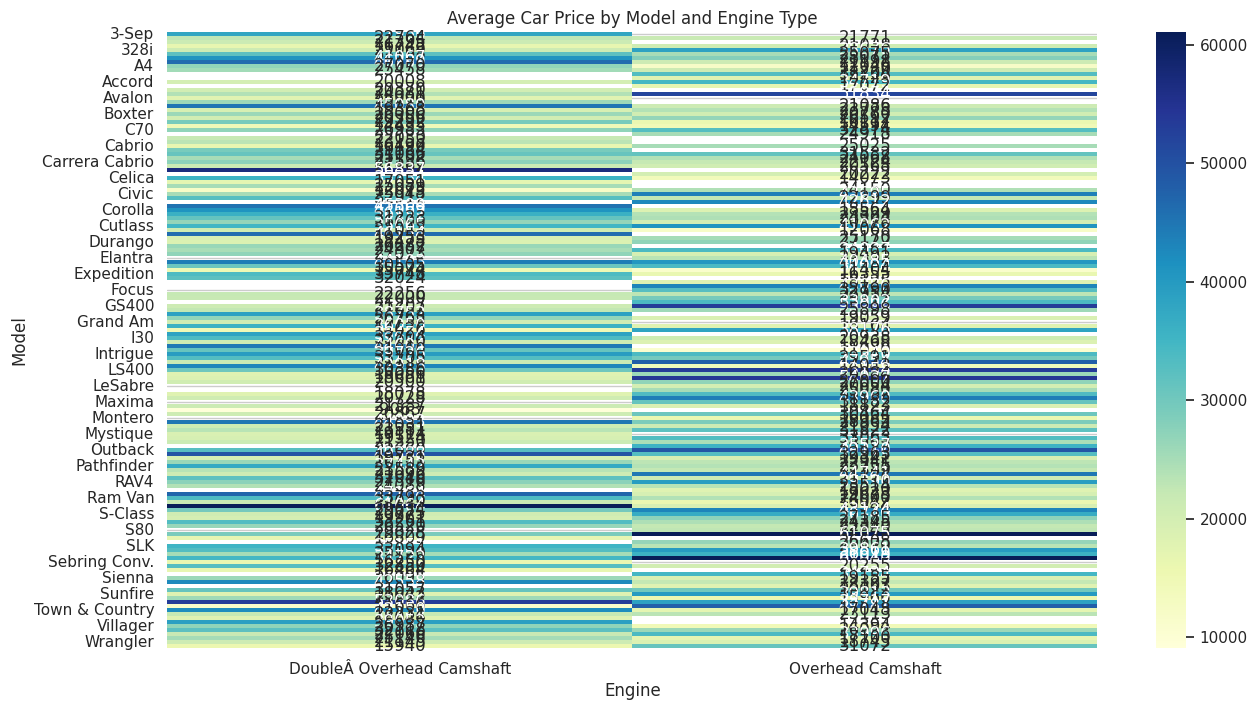

In [167]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(avg_price_model_engine, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine')
plt.ylabel('Model')
plt.show()


# **EDA-3**

In [207]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view'

download_url = gdown.download(url, 'amazon_sales.csv', quiet=False, fuzzy=True)

df = pd.read_csv('amazon_sales.csv')

df.head()


Downloading...
From: https://drive.google.com/uc?id=1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB
To: /content/amazon_sales.csv
100%|██████████| 4.74M/4.74M [00:00<00:00, 19.9MB/s]


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

sns.set(style="whitegrid")

df = pd.read_csv('amazon_sales.csv')
print(f"Loaded dataset: {df.shape[0]} rows, {df.shape[1]} columns")

numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].replace({r'[^\d.]':''}, regex=True), errors='coerce')

df = df.dropna(subset=numeric_cols).reset_index(drop=True)
print(f"After cleaning numeric columns: {df.shape[0]} rows remain\n")


Loaded dataset: 1465 rows, 16 columns
After cleaning numeric columns: 1462 rows remain



1. Average rating per category:
category
Computers&Accessories|Tablets                                                                                              4.600000
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                                   4.500000
Electronics|Cameras&Photography|Accessories|Film                                                                           4.500000
Computers&Accessories|Components|Memory                                                                                    4.500000
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                               4.500000
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                         4.500000
HomeImprovement|Electrical|CordManagement                                                                                  4.500000
Home&Kitchen|Kitchen&HomeAppliances

<ipython-input-210-f14ab1af48f7>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


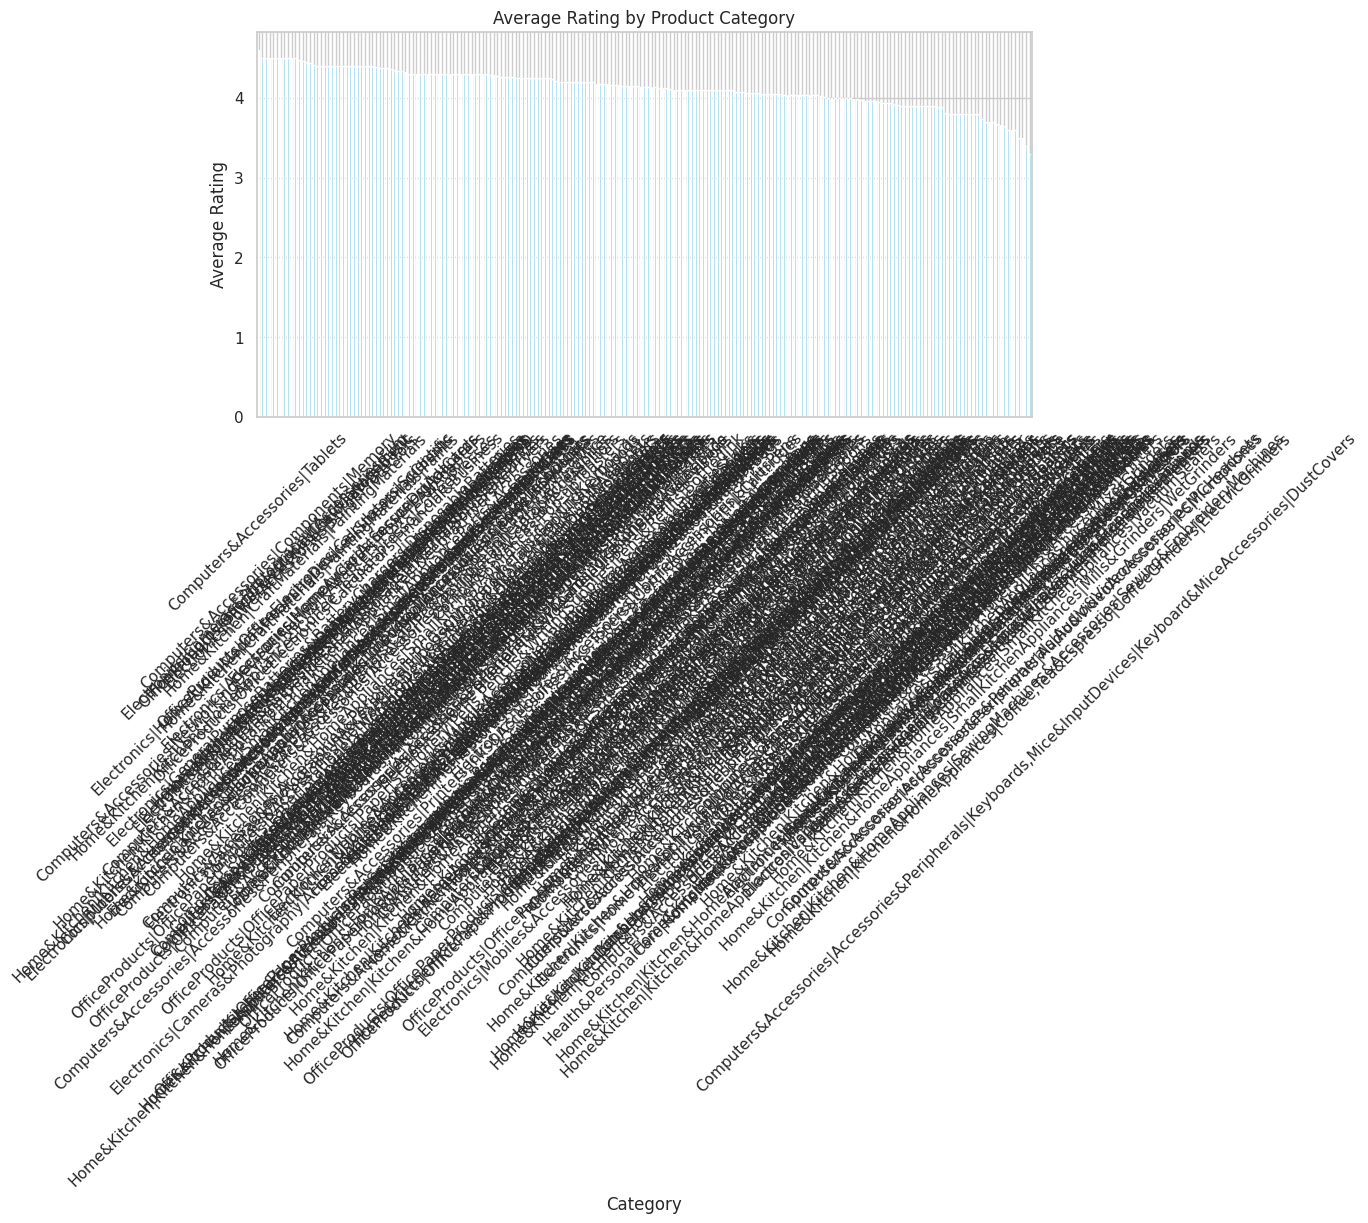

In [210]:
# 1. What is the average rating for each product category
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("1. Average rating per category:")
print(avg_rating_by_category.to_string(), "\n")

plt.figure(figsize=(10, 5))
avg_rating_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [195]:
# 2. What are the top rating_count products by category
idx_top_rating = df.groupby('category')['rating_count'].idxmax()
top_rating_count = df.loc[idx_top_rating, ['category', 'product_name', 'rating_count']]
print("2. Top rating_count product in each category:")
print(top_rating_count.to_string(index=False))


2. Top rating_count product in each category:
                                                                                                               category                                                                                                                                                                                                                    product_name  rating_count
                                                 Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                               Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black        1118.0
                                                Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Chargi

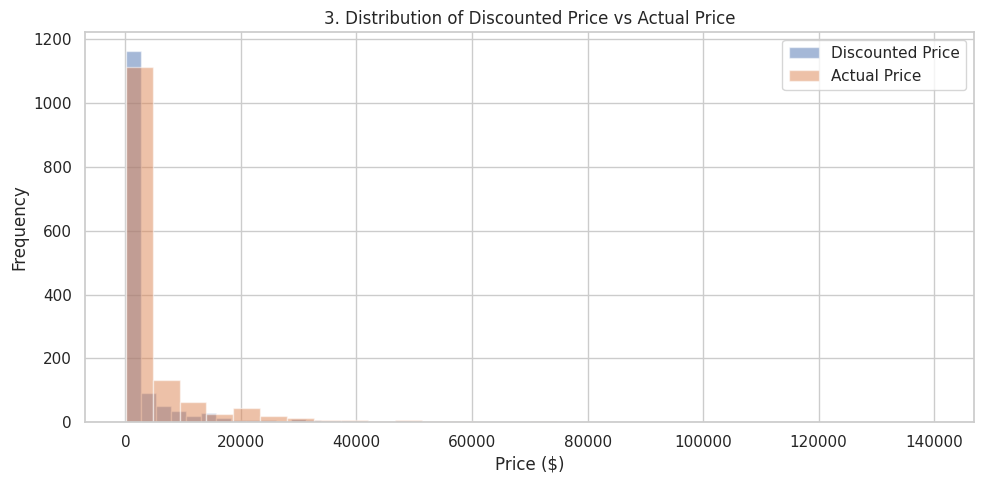

In [196]:
# 3. What is the distribution of discounted prices vs. actual prices
plt.figure(figsize=(10,5))
plt.hist(df['discounted_price'], bins=30, alpha=0.5, label='Discounted Price')
plt.hist(df['actual_price'], bins=30, alpha=0.5, label='Actual Price')
plt.title('3. Distribution of Discounted Price vs Actual Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


4. Average discount percentage by category:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                                 90.000000
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                         90.000000
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                        90.000000
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                        88.000000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers              87.500000
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                                 82.000000
Computers&Accessories|Components|InternalHardDrives                                                                        80.000000
Computers&Access

<ipython-input-197-bc1ca753643c>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


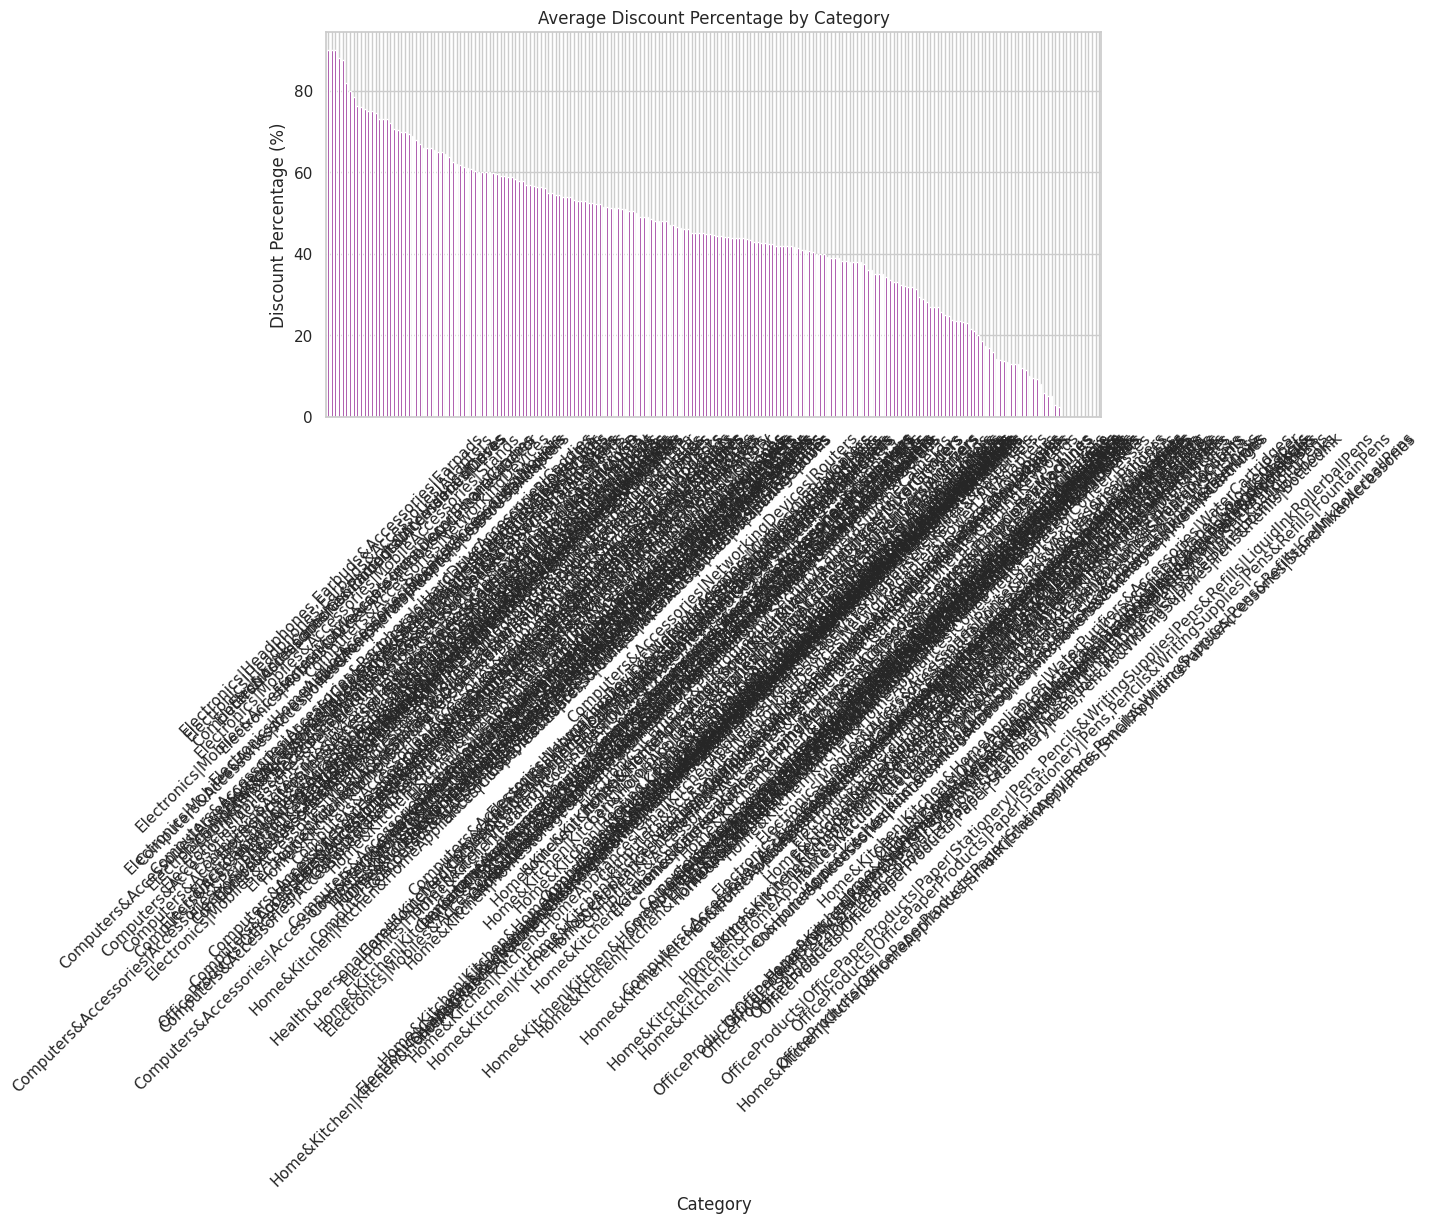

In [197]:
# 4. How does the average discount percentage vary across categories
avg_discount_pct = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("4. Average discount percentage by category:")
print(avg_discount_pct.to_string(), "\n")

plt.figure(figsize=(10, 5))
avg_discount_pct.plot(kind='bar', color='purple')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Discount Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. Top 10 most popular product names by total rating count:
product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt BassHeads 100 in-Ear Wired Headpho

<ipython-input-211-62878139a6d2>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


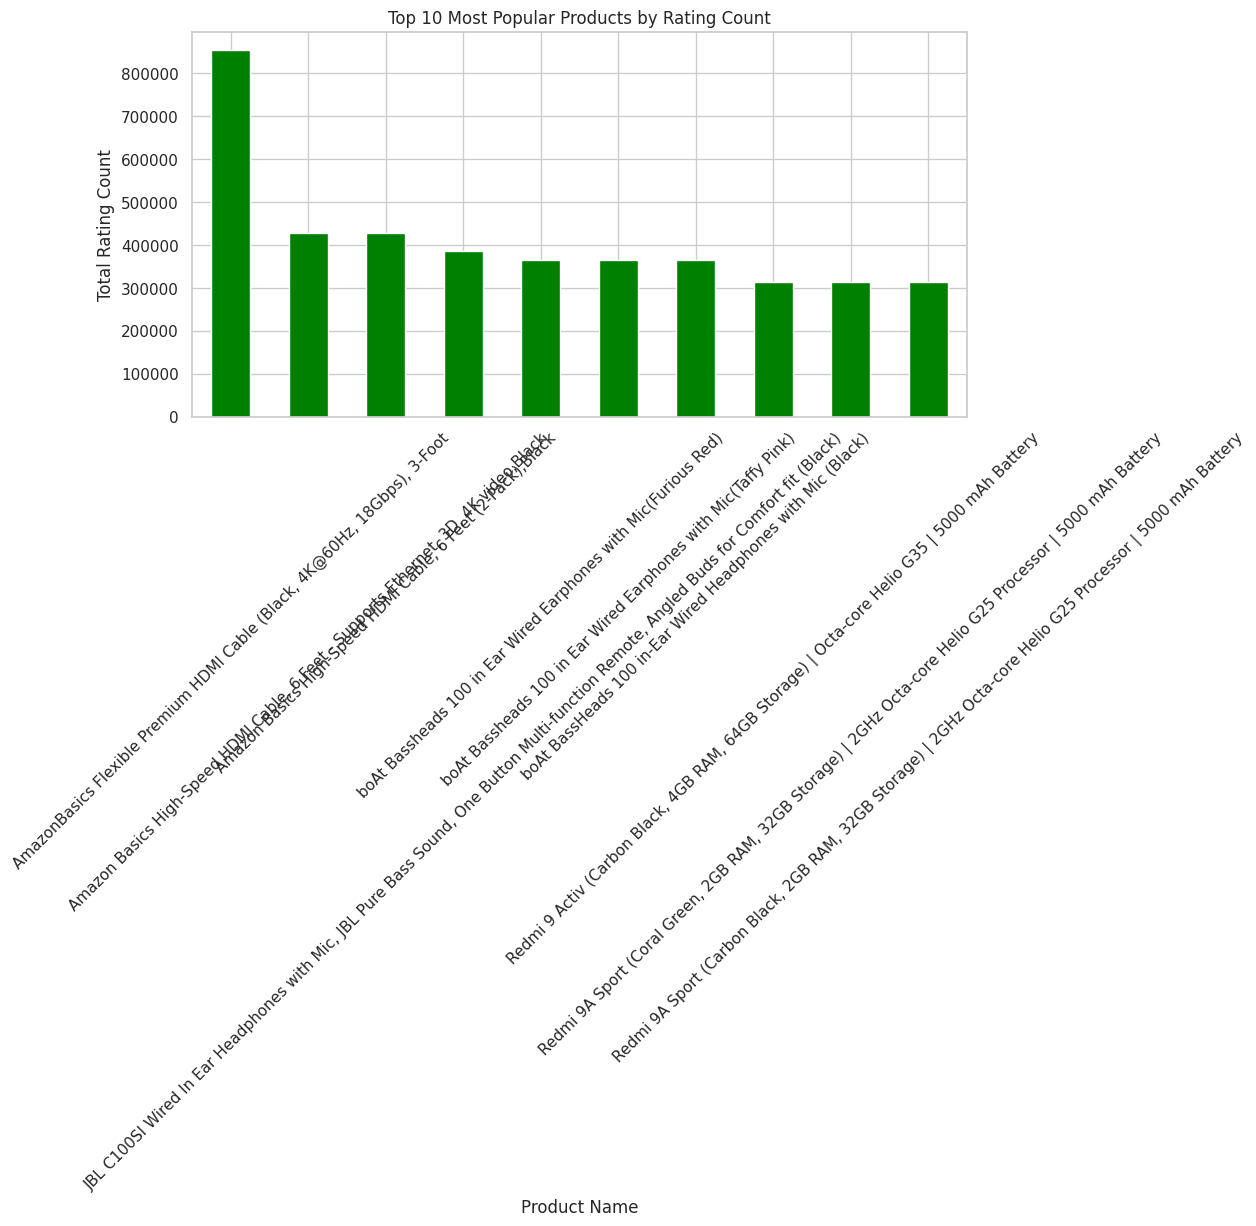

In [211]:
# 5. What are the most popular product names
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print("5. Top 10 most popular product names by total rating count:")
print(popular_products.to_string(), "\n")

plt.figure(figsize=(10, 5))
popular_products.plot(kind='bar', color='green')
plt.title('Top 10 Most Popular Products by Rating Count')
plt.xlabel('Product Name')
plt.ylabel('Total Rating Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [199]:
# 6. What are the most popular product keywords
all_names = df['product_name'].str.lower().dropna()
words = []
for name in all_names:
    words += re.findall(r'\b\w+\b', name)

word_counts = Counter(words)
most_common_keywords = word_counts.most_common(20)
print("6. Top 20 product keywords:")
for keyword, freq in most_common_keywords:
    print(f"   {keyword}: {freq}")


6. Top 20 product keywords:
   with: 750
   for: 673
   black: 528
   usb: 416
   cable: 412
   1: 412
   and: 330
   c: 285
   3: 273
   2: 267
   charging: 245
   type: 241
   to: 215
   fast: 210
   in: 178
   smart: 175
   white: 169
   tv: 152
   compatible: 145
   5: 137


7. Top 10 popular review titles by frequency:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product fro

<ipython-input-212-8929c41cdb67>:12: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-212-8929c41cdb67>:12: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-212-8929c41cdb67>:12: UserWarning: Glyph 129312 (\N{FACE WITH COWBOY HAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-212-8929c41cdb67>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

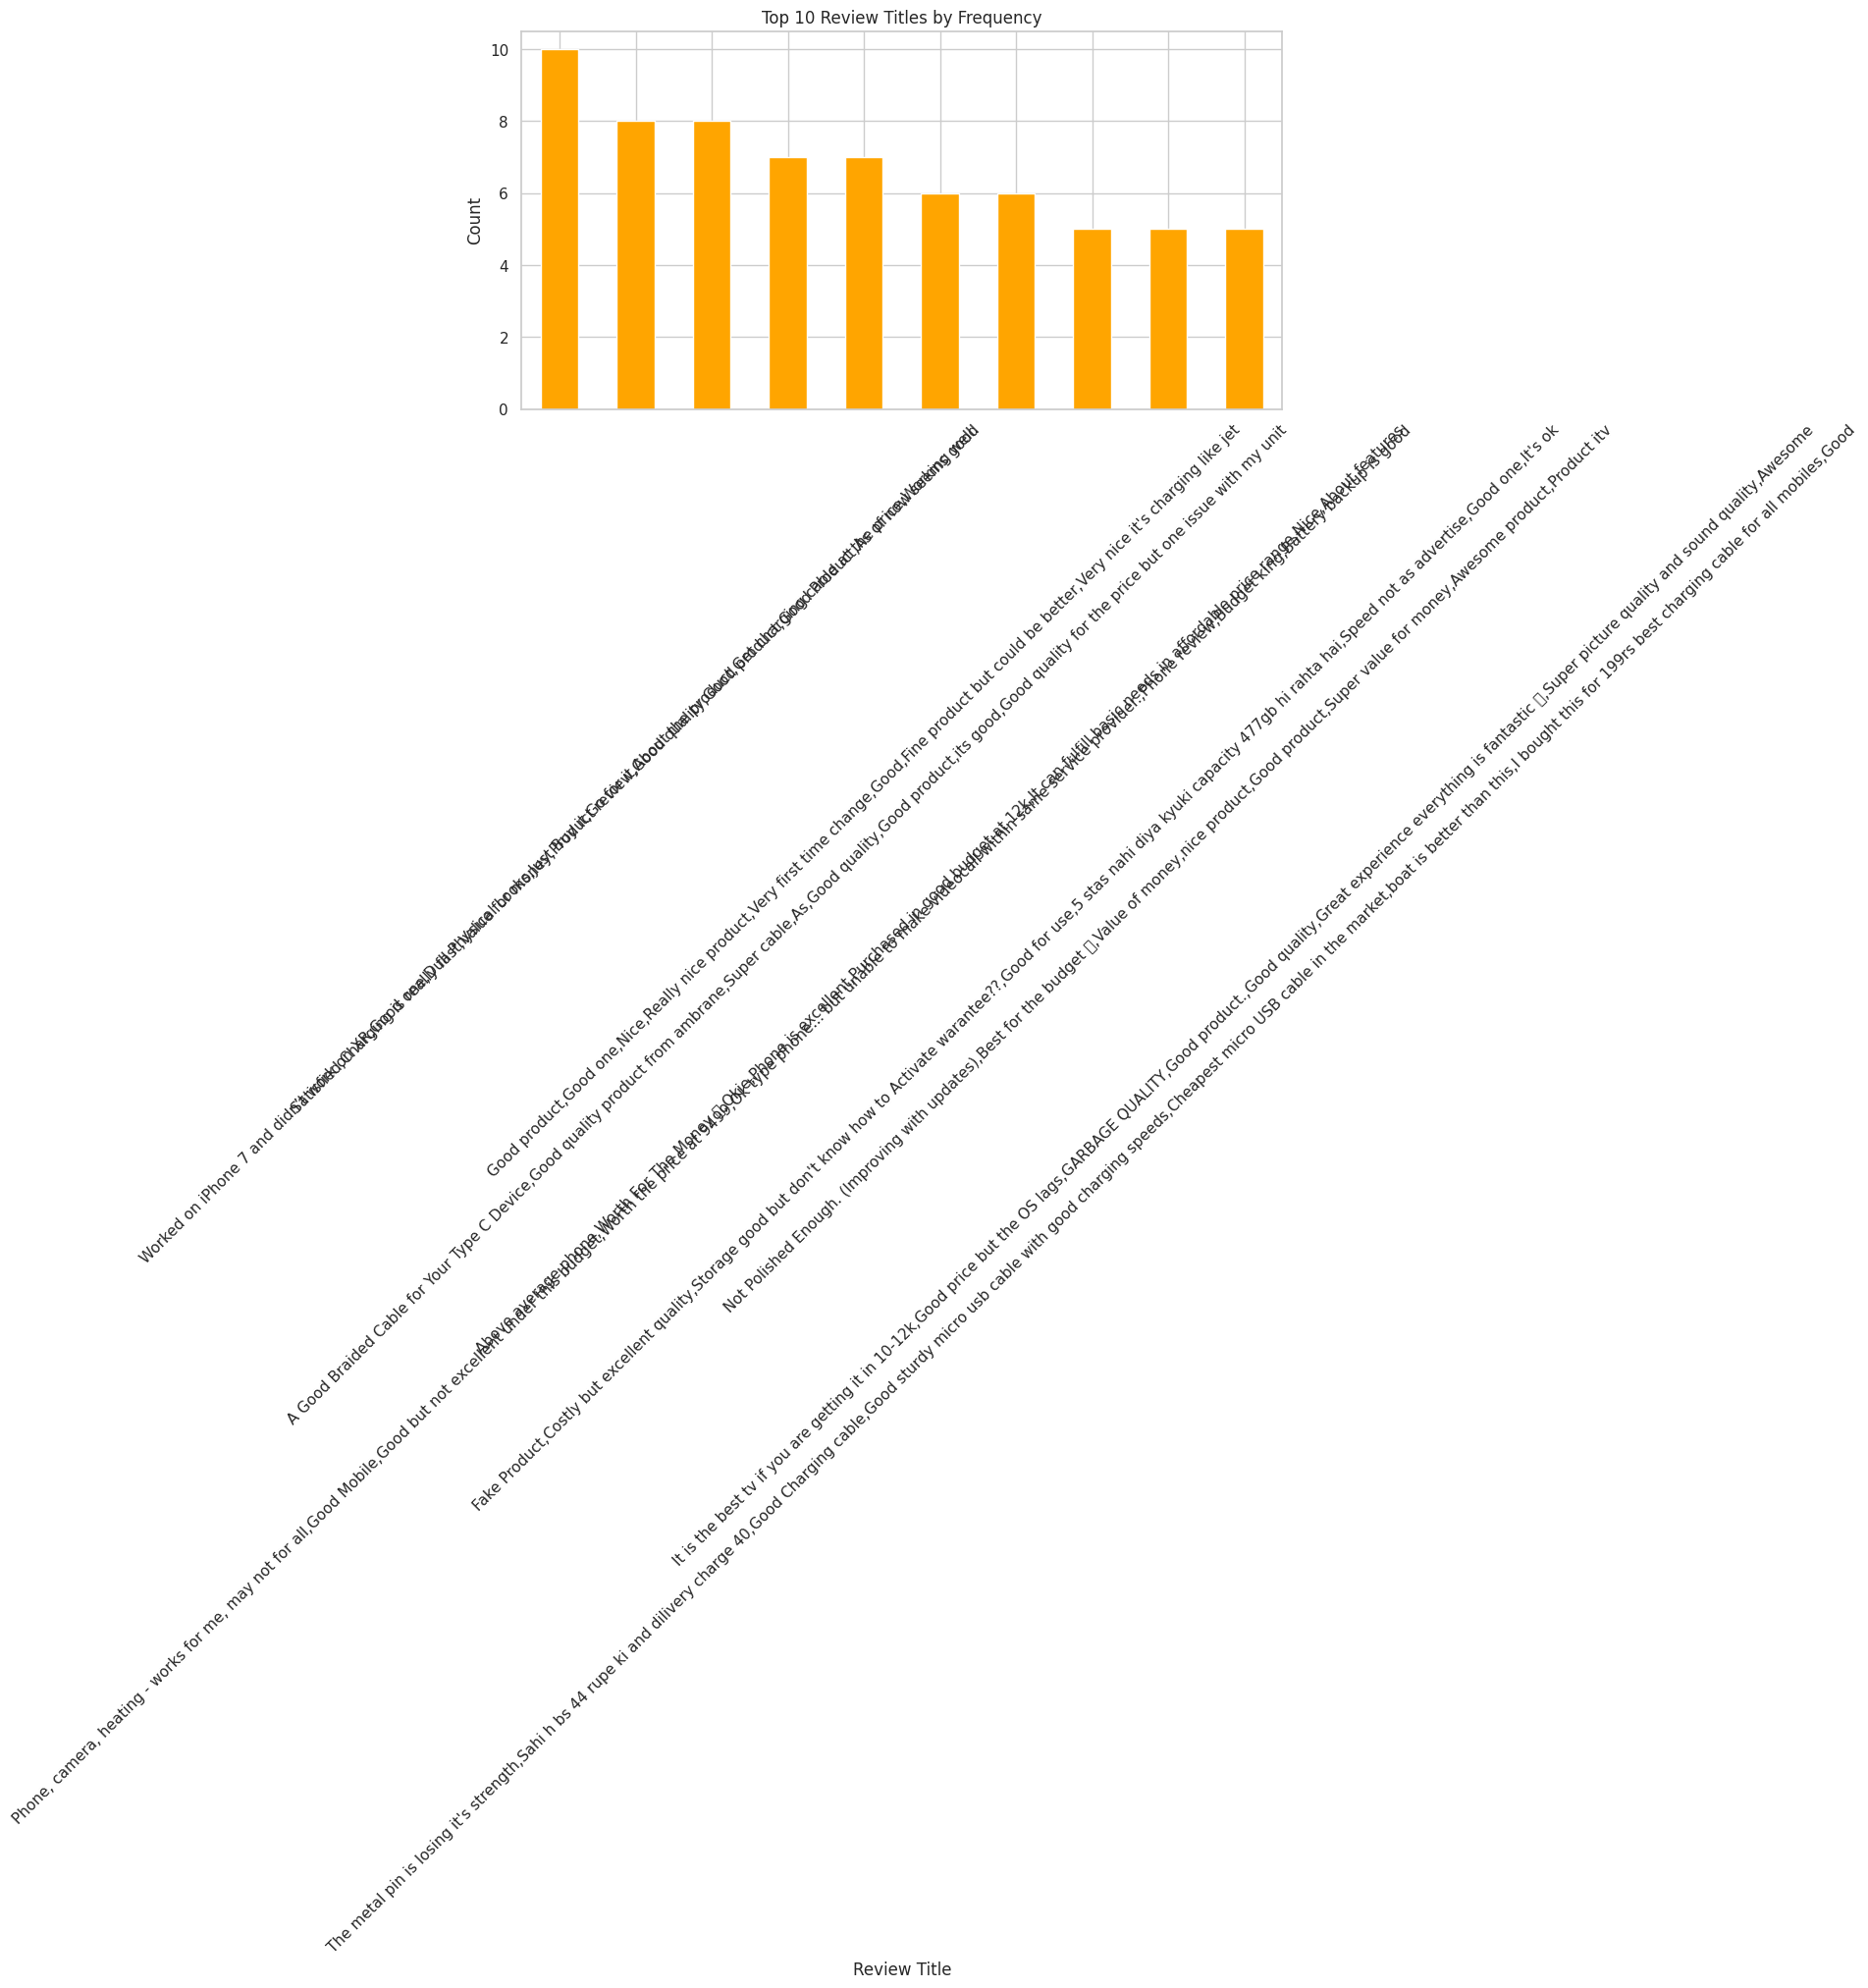

In [212]:
# 7. What are the most popular product reviews
top_review_titles = df['review_title'].value_counts().head(10)
print("7. Top 10 popular review titles by frequency:")
print(top_review_titles.to_string(), "\n")

plt.figure(figsize=(10,5))
top_review_titles.plot(kind='bar', color='orange')
plt.title('Top 10 Review Titles by Frequency')
plt.xlabel('Review Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8. Correlation between discounted price and rating: 0.121



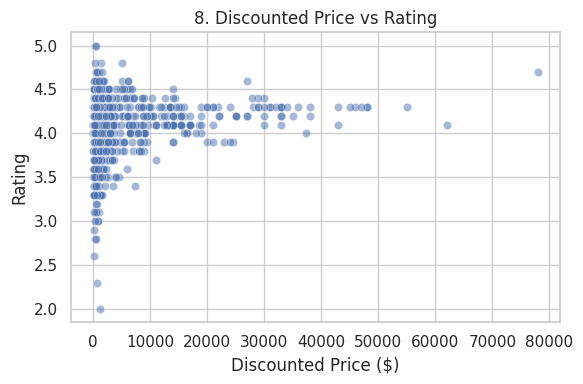

In [201]:
# 8. What is the correlation between discounted_price and rating
corr_val = df[['discounted_price', 'rating']].corr().iloc[0,1]
print(f"8. Correlation between discounted price and rating: {corr_val:.3f}\n")

plt.figure(figsize=(6,4))
sns.scatterplot(x='discounted_price', y='rating', data=df, alpha=0.5)
plt.title('8. Discounted Price vs Rating')
plt.xlabel('Discounted Price ($)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


9. Top 5 categories by average rating:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5 



<ipython-input-214-6134a08d1170>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


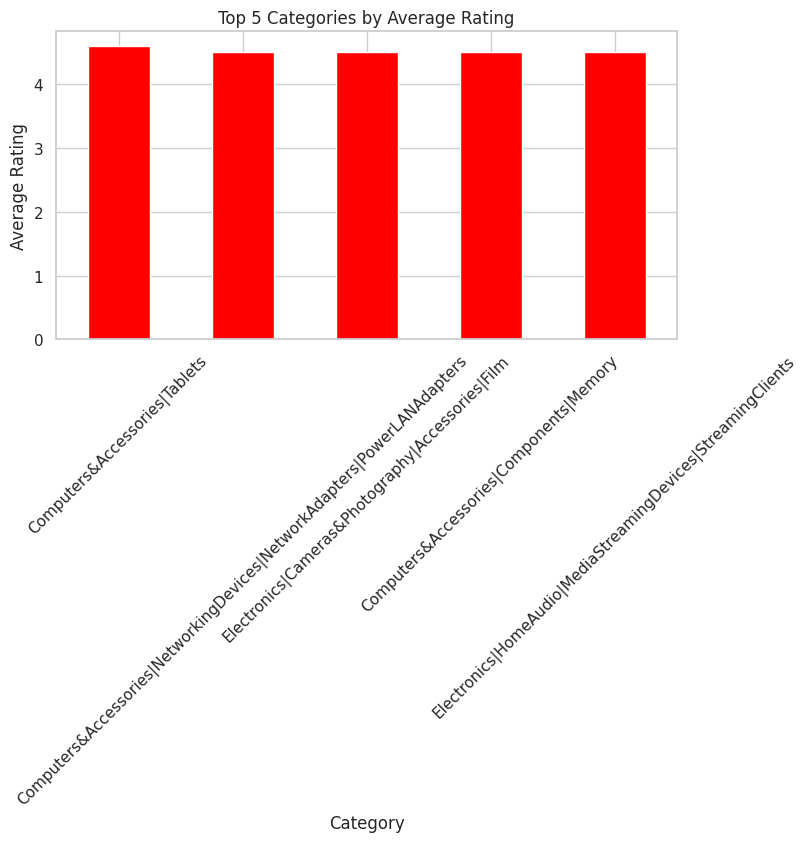

In [214]:
# 9. What are the Top 5 categories based on the highest ratings
top_5_categories = avg_rating_by_category.head(5)
print("9. Top 5 categories by average rating:")
print(top_5_categories.to_string(), "\n")

plt.figure(figsize=(8,4))
top_5_categories.plot(kind='bar', color='red')
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [206]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis
# Categories with lower average ratings may need product/service quality improvements.
# In categories where discount percentages are low but actual prices are high, consider promotional campaigns.
# Enhance marketing and SEO using the most common keywords identified.
# Investigate low-rating reviews for recurring negative feedback to improve products.
# The relatively low correlation ({corr_val:.3f}) between price and rating suggests factors other than price drive satisfaction.
# Products with high rating_count but lower average ratings could benefit from improved user experiences or feature upgrades.


# **EDA-4**

In [115]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view'

download_url = gdown.download(url, 'spotify_hiphop.csv', quiet=False, fuzzy=True)

df = pd.read_csv('spotify_hiphop.csv')

df.head()


Downloading...
From: https://drive.google.com/uc?id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP
To: /content/spotify_hiphop.csv
100%|██████████| 29.5k/29.5k [00:00<00:00, 48.4MB/s]


Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('spotify_hiphop.csv')
print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns\n")


Dataset loaded successfully: 440 rows, 5 columns



In [118]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print("1. Null values per column:")
print(df.isnull().sum(), "\n")

df.dropna(inplace=True)
print("Duplicates before dropping:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after dropping: 0\n")
print(f"After cleaning: {df.shape[0]} rows, {df.shape[1]} columns\n")

1. Null values per column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64 

Duplicates before dropping: 0
Duplicates after dropping: 0

After cleaning: 413 rows, 5 columns



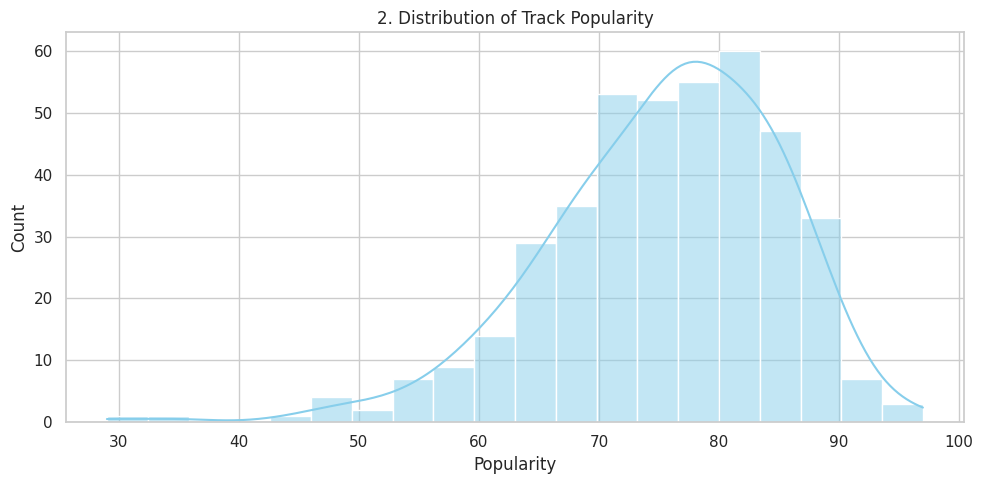

In [119]:
# 2.  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title("2. Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


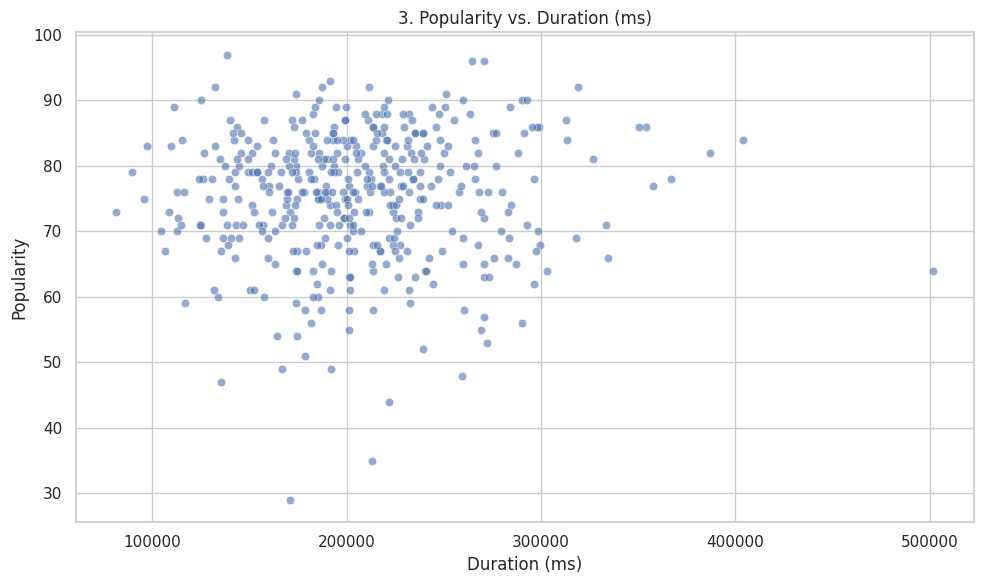

In [120]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title("3. Popularity vs. Duration (ms)")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

<ipython-input-122-c8b539e446db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=top_artists, palette='viridis')


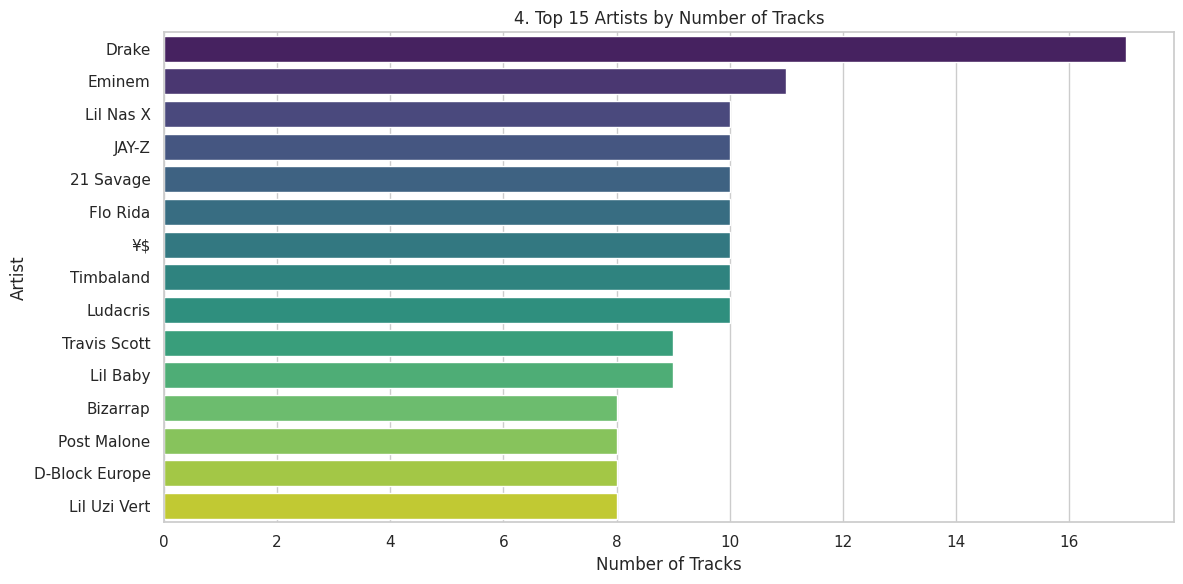

In [122]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 6))
top_artists = df['Artist'].value_counts().head(15).index
sns.countplot(y='Artist', data=df, order=top_artists, palette='viridis')
plt.title("4. Top 15 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


In [123]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("5. Top 5 Least Popular Tracks:")
print(least_popular.to_string(index=False), "\n")


5. Top 5 Least Popular Tracks:
        Artist                    Track Name  Popularity
        Pressa Attachments (feat. Coi Leray)          29
 Justin Bieber                    Intentions          35
French Montana               Splash Brothers          44
      Lil Baby                 On Me - Remix          47
   Wyclef Jean     911 (feat. Mary J. Blige)          48 



In [124]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
artist_popularity_sum = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False)
top5_artists = artist_popularity_sum.head(5).index.tolist()
avg_pop_top5 = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("6. Average Popularity for Top 5 Artists:")
print(avg_pop_top5.to_string(), "\n")

6. Average Popularity for Top 5 Artists:
Artist
¥$           85.100000
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000 



In [125]:
# 7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
print("7. Most Popular Track for Each of the Top 5 Artists:")
for artist in top5_artists:
    top_track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).iloc[0]
    print(f"  Artist: {artist}  |  Track: {top_track['Track Name']}  |  Popularity: {top_track['Popularity']}")
print()

7. Most Popular Track for Each of the Top 5 Artists:
  Artist: Drake  |  Track: Rich Baby Daddy (feat. Sexyy Red & SZA)  |  Popularity: 92
  Artist: Eminem  |  Track: Without Me  |  Popularity: 90
  Artist: ¥$  |  Track: CARNIVAL  |  Popularity: 96
  Artist: 21 Savage  |  Track: redrum  |  Popularity: 96
  Artist: Flo Rida  |  Track: Low (feat. T-Pain)  |  Popularity: 84



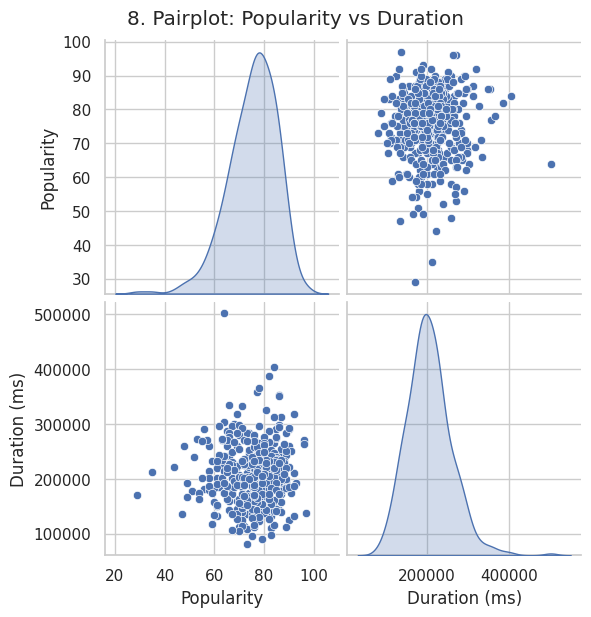

In [127]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']], height=3, diag_kind='kde')
plt.suptitle("8. Pairplot: Popularity vs Duration", y=1.02)
plt.show()


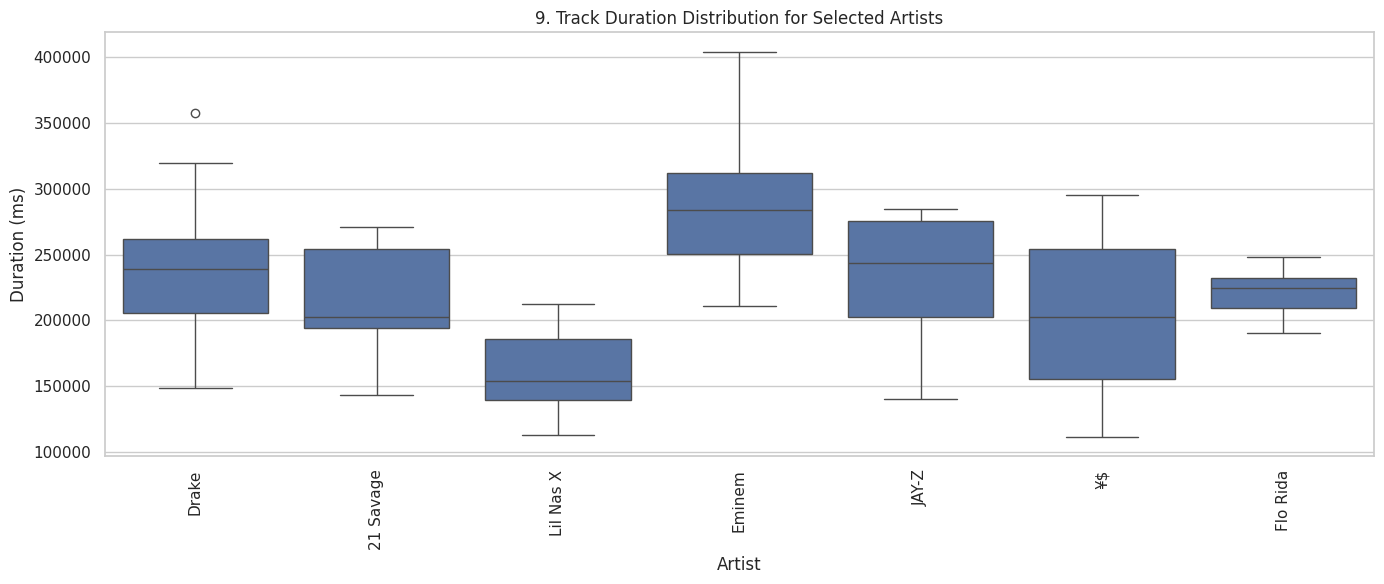

In [128]:
# 9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
selected_artists = top5_artists + df['Artist'].value_counts().head(5).index.tolist()
selected_artists = list(dict.fromkeys(selected_artists))
plt.figure(figsize=(14, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(selected_artists)])
plt.title("9. Track Duration Distribution for Selected Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

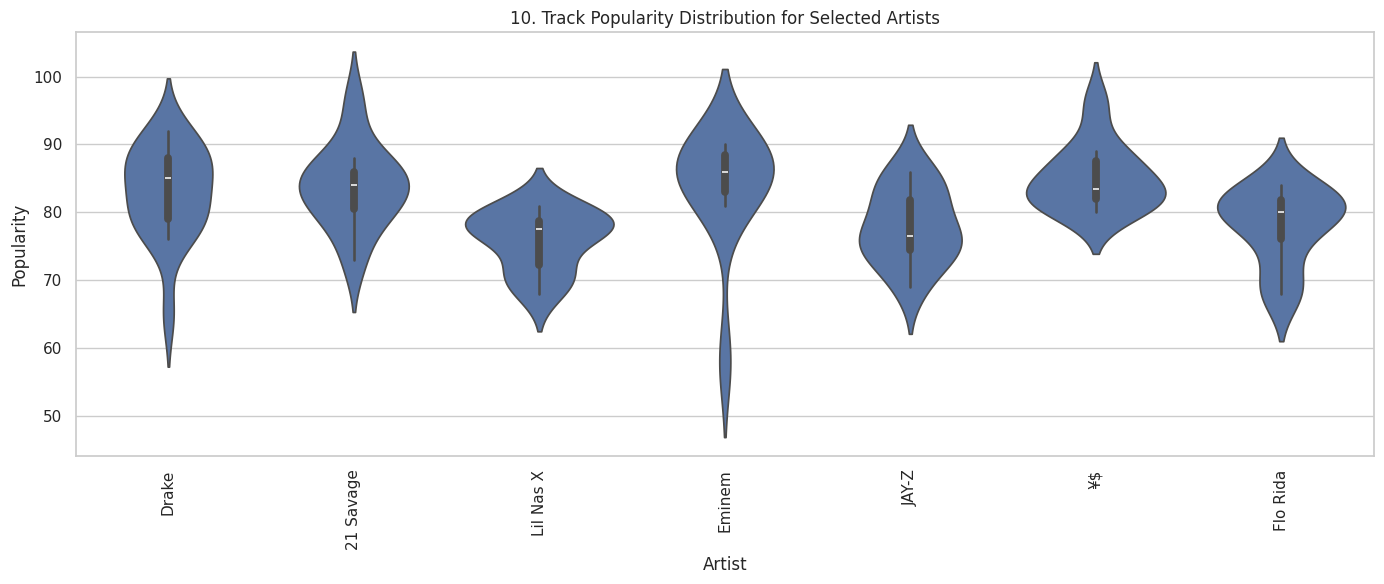

In [129]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(14, 6))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(selected_artists)])
plt.title("10. Track Popularity Distribution for Selected Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()